In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
to_gray = lambda img:np.sum(img.copy() * [.299,.587,.114], axis=-1)

In [3]:
img = np.array(Image.open('lineas.png'))[:,:,:-1]
img_g = to_gray(np.array(img)).astype(int)

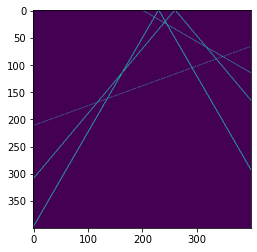

In [4]:
plt.imshow(img_g)

In [14]:
def apply_mask(image, kernel):
    new_img = np.zeros(image.shape)
    for i in range(img_g.shape[0]-kernel.shape[0]):
        for j in range(img_g.shape[1]-kernel.shape[1]):  
            new_img[i+kernel.shape[0],j+kernel.shape[1]] = np.sum(img_g[i:i+kernel.shape[0],j:j+kernel.shape[1]] * kernel)
    return new_img

def line_detection(image, mask_max_side_size, angle, thickness, th):
    
    if abs(angle) < 45:
        co = abs(int(mask_max_side_size * np.tan(angle * np.pi / 180)))
        ca = abs(int(mask_max_side_size))
    else:
        ca = abs(int(mask_max_side_size // np.tan(angle * np.pi / 180)))
        co = abs(int(mask_max_side_size))
    
    mask = np.zeros((ca,co))
    
    for i in range(ca):
        for j in range(co):
            mask[i,j] = thickness - abs(i * np.tan(abs(angle) * np.pi / 180) - j)
    
    mask[mask < 0] = - 1
    mask[mask != -1] = 6
    mask = mask.T
    if angle < 0: 
        filted_img = apply_mask(image, mask)
        print(mask)
    else: 
        filted_img = apply_mask(image, mask[::-1])
        print(mask[::-1])
    filted_img[filted_img < th] = 0
    filted_img[filted_img != 0] = 1
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.imshow(filted_img,cmap="gray")
    plt.show()
    return(filted_img)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  6.  6. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  6.  6. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  6. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  6.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  6.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  6.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


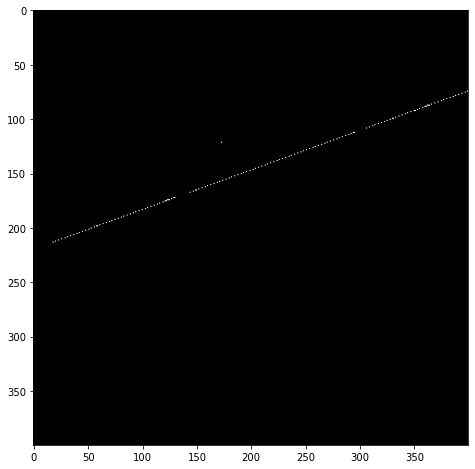

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
line_detection(img_g, 17, 24, .4,4000)

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  6.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  6. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  6. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  6. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  6. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  6. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  6. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 6. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


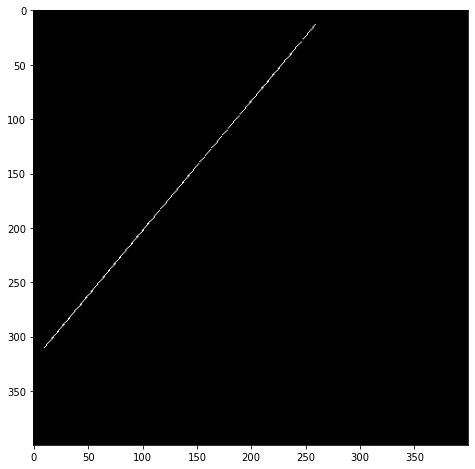

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
line_detection(img_g, 13, 50, .4,3800)

[[-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  6.]
 [-1. -1. -1. -1. -1.  6. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  6. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  6. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  6. -1. -1. -1. -1.]
 [-1.  6. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 6. -1. -1. -1. -1. -1. -1.]]


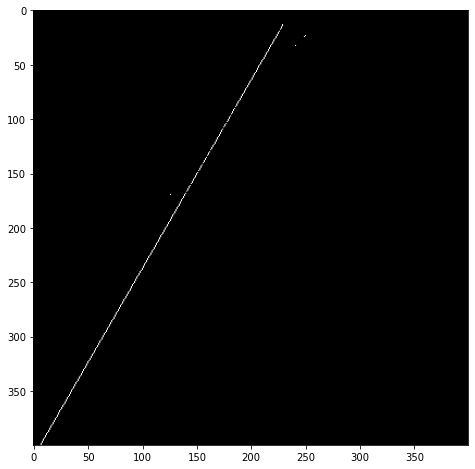

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
line_detection(img_g, 13, 60, .5,3800)

[[ 6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  6. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  6. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  6. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  6. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  6. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  6. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  6. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  6. -1.]]


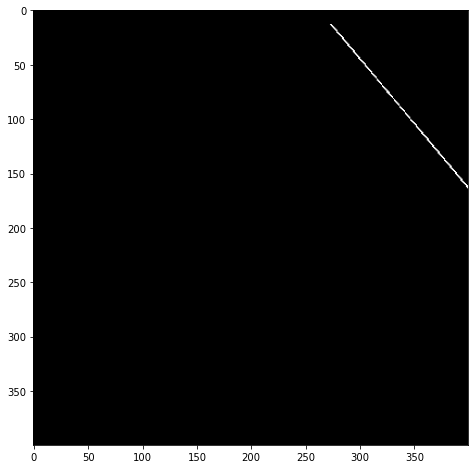

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
line_detection(img_g, 13, -45, .5,3800)

[[ 6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  6.  6. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  6.  6. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  6.  6. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  6. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  6.  6. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  6.  6. -1.]]


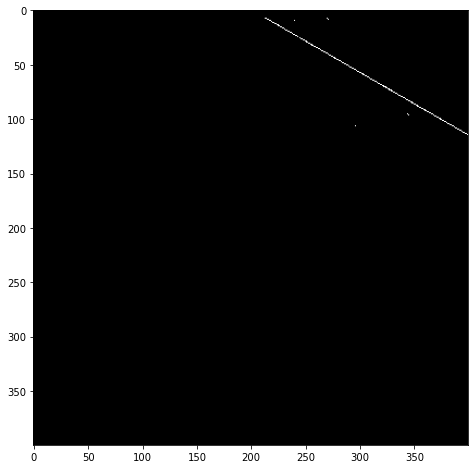

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
line_detection(img_g, 13, -30, .5,3800)

[[ 6. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1.  6. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1.  6. -1. -1.]
 [-1. -1.  6. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1.  6. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  6.]
 [-1. -1. -1. -1. -1.]]


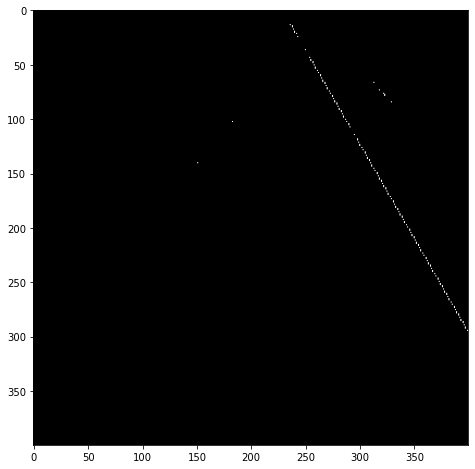

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
line_detection(img_g, 13, -70, .6,3000)